<a href="https://colab.research.google.com/github/Leandro-Braga/Estudo_de_Caso/blob/main/Atividade_Leandro_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# condacolab KERNEL RESTART
print("🔁 Restarting kernel...")
get_ipython().kernel.do_shutdown(True)

🔁 Restarting kernel...


{'restart': True, 'status': 'ok'}

**Tema: Redes Neurais**

O Dataset Fashion-MNIST é um conjunto de dados de imagens de artigos, consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem de 28x28, associada a um rótulo de 10 classes. Fashion-MNIST serve como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura das divisões de treinamento e teste.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total.

Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255.

A primeira coluna é composta pelos rótulos das classes (veja acima), e representa a peça de vestuário.

O restante contém os valores de pixel da imagem associada.

### Classificador de imagens usando rede neural

In [2]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.models import Sequential
import pydot

In [3]:
# Verificando a versão do KERAS 
keras.__version__

'2.7.0'

In [4]:
# Verificando a versão do Tensoflow 
tf.__version__

'2.7.0'

In [5]:
# Carregando a base de dados

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


A dimensão do treinamento original, conjunto de teste são os seguintes:

In [6]:
print("x_train = ",x_train_full.shape,"y_train = ",y_train_full.shape,"x_test = ",x_test.shape,"y_test = ",y_test.shape)

x_train =  (60000, 28, 28) y_train =  (60000,) x_test =  (10000, 28, 28) y_test =  (10000,)


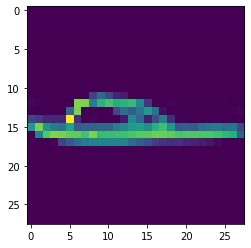

In [7]:
plt.imshow(x_train_full[30])

In [8]:
y_train_full[30]

5

Existem 10 classes diferentes de imagens, segue:

In [9]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
class_names[y_train_full[30]]

'Sandal'

In [11]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### NORMALIZAÇÃO DE DADOS

In [12]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

Visualização dos dados

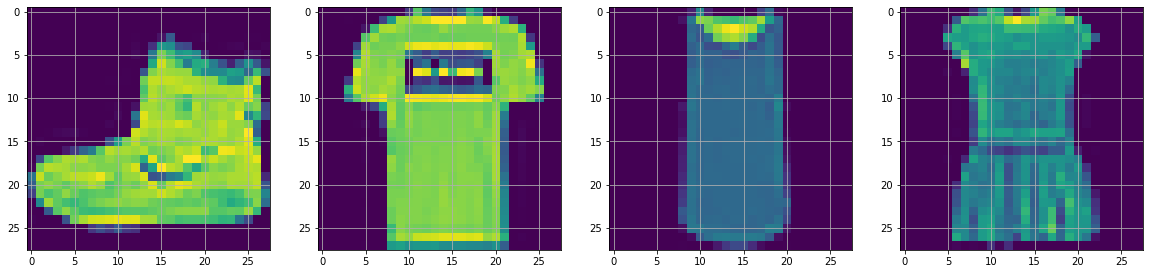

In [13]:
fig, axs = plt.subplots(1,4, figsize=(20, 10))
for ax, i in zip(axs, range(6)):
    ax.imshow(x_train_n[i])
    ax.grid(True)

plt.show()

Dividindo os dados em conjuntos de treinamento/validação/teste


*   Dados de treinamento = usado para treinar o modelo
*   Dados de validação = usado para ajustar os hiperparâmetros e avaliar o modelo
*   Dados de teste = usado para testar o modelo após o modelo ter passado pela verificação inicial do conjunto de validação



In [14]:
x_valid, x_train = x_train_n[:5000],x_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [15]:
unique, counts = np.unique(x_test, return_counts=True)
df = pd.Series(zip(unique, counts))
print(df)
# Todos os tipos de roupas que têm a mesma contagem presente no conjunto de dados

0                     (0.0, 3919183)
1       (0.00392156862745098, 79560)
2       (0.00784313725490196, 48331)
3      (0.011764705882352941, 32159)
4       (0.01568627450980392, 22181)
                   ...              
251        (0.984313725490196, 6953)
252       (0.9882352941176471, 7414)
253       (0.9921568627450981, 8451)
254       (0.996078431372549, 11069)
255                     (1.0, 62787)
Length: 256, dtype: object


In [16]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [17]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### CRIANDO A ARQUITETURA MODELO

1. API DE MODELO SEQUENCIAL (SIMPLES E DIRETO)
2. API FUNCIONAL (NN COMPLEXO)

In [18]:
np.random.seed(42) # random seed é usado para replicar sempre o mesmo resultado
tf.random.set_seed(42)

**Construir o modelo**

Usaremos um modelo Sequencial.

O modelo Sequencial é uma pilha linear de camadas. Ele pode ser inicializado primeiro e, em seguida, adicionamos camadas usando o método add ou podemos adicionar todas as camadas no estágio de inicialização. As camadas adicionadas são as seguintes:

In [19]:
model = keras.models.Sequential() # USANDO API SEQUENCIAL
model.add(keras.layers.Flatten(input_shape=[28,28])) # camada de entrada, convertendo 2D para 28*28 pixels usando flatten
model.add(keras.layers.Dense(300,activation="relu")) # 1ª camada oculta, 300=não de neurônios, relu = função de ativação
model.add(keras.layers.Dense(100,activation="relu")) # 2ª camada oculta
model.add(keras.layers.Dense(10,activation="softmax")) # camada de saída, categorias=10
# relu = 0 para todos os números negativos ou relu = saída para os números positivos

**Inspecionando o modelo**

Vamos verificar o modelo que inicializamos

In [20]:
model.summary()
# parâmetros
# dense = 784*300+300 = 235500
# dense_1 = 300*100+100 = 30100
# dense_2 = 100*10+10 = 1010
# none  = sem limite nos dados de entrada

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Visualizando a estrutura da rede neural (usando pydot)

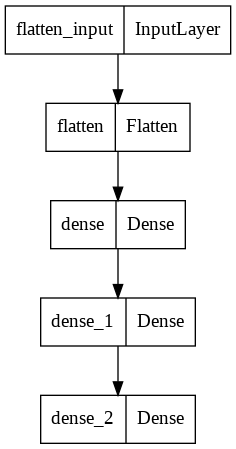

In [21]:
keras.utils.plot_model(model)

In [22]:
weights, biases = model.layers[1].get_weights()

In [23]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

processos de aprendizagem

In [27]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# scc = para dados categóricos
# sgd = descida de gradiente estocástica
# para rótulos binários = binary_cross_entropy

In [28]:
print("Fashion MNIST treinamento -  rows:",x_train.shape[0]," columns:", x_train.shape[1:4])
print("Fashion MNIST validação -  rows:",x_valid.shape[0]," columns:", x_valid.shape[1:4])
print("Fashion MNIST teste -  rows:",x_test.shape[0]," columns:", x_test.shape[1:4])

Fashion MNIST treinamento -  rows: 55000  columns: (28, 28)
Fashion MNIST validação -  rows: 5000  columns: (28, 28)
Fashion MNIST teste -  rows: 10000  columns: (28, 28)


Executamos o modelo com o conjunto de treinamento. Também estamos usando o conjunto de validação (um subconjunto do conjunto de treinamento original) para validação.

In [29]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid, y_valid))
# por padrão epochs = 1

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5209 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4344 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4391 - accuracy: 0.8454 - val_loss: 0.5290 - val_accuracy: 0.8014
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4123 - accuracy: 0.8565 - val_loss: 0.3916 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3744 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8678 - val_loss: 0.3713 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8712 - val_loss: 0.3617 - val_accuracy:

In [30]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [31]:
model_history.history

{'accuracy': [0.7643272876739502,
  0.8317636251449585,
  0.8454363346099854,
  0.8565090894699097,
  0.8617636561393738,
  0.8677999973297119,
  0.871181845664978,
  0.8746727108955383,
  0.8792545199394226,
  0.8820545673370361,
  0.8837272524833679,
  0.8865818381309509,
  0.8888727426528931,
  0.8916000127792358,
  0.8935818076133728,
  0.897454559803009,
  0.8972908854484558,
  0.8998181819915771,
  0.9023091197013855,
  0.9034000039100647,
  0.9052363634109497,
  0.9071090817451477,
  0.9082182049751282,
  0.9103817939758301,
  0.9120363593101501,
  0.9138727188110352,
  0.9150363802909851,
  0.9162545204162598,
  0.9181272983551025,
  0.9192363619804382],
 'loss': [0.7236968874931335,
  0.48415565490722656,
  0.4390614330768585,
  0.4123377501964569,
  0.3938591182231903,
  0.37515193223953247,
  0.36325040459632874,
  0.35174188017845154,
  0.3414267301559448,
  0.33207839727401733,
  0.3241569697856903,
  0.31493544578552246,
  0.3081856966018677,
  0.3021668791770935,
  0.294

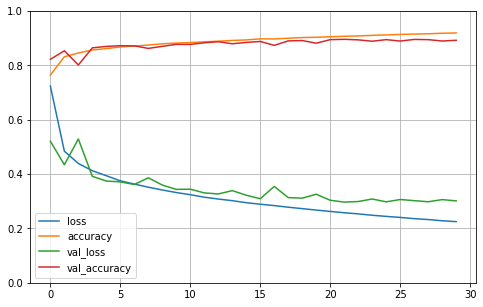

In [32]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Avaliamos a precisão do modelo com base nos valores previstos para o conjunto de teste. Vamos verificar o valor de validação durante o treinamento.

In [33]:
# Calculamos a perda e a precisão do teste
score = model.evaluate(x_test, y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.33515679836273193
Teste accuracy: 0.8826000094413757


In [34]:
# model = keras.models.Sequential() # USANDO API SEQUENCIAL
# model.add(keras.layers.Flatten(input_shape=[28,28])) # camada de entrada, convertendo 2D para 28*28 pixels usando flatten
# model.add(keras.layers.Dense(300,activation="relu")) # 1ª camada oculta, 300=não de neurônios, relu = função de ativação
# model.add(keras.layers.Dense(100,activation="relu")) # 2ª camada oculta
# model.add(keras.layers.Dense(10,activation="softmax")) # camada de saída, categorias=10
# # relu = 0 para todos os números negativos ou relu = saída para os números positivos


# model.fit(train_images, train_labels, shuffle=True, batch_size=100, epochs=50, validation_split=0.2)

# model_history_2 = model_2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

# model_2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

### Retreinar o modelo

In [35]:
# x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# x_test = x_test_n

# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# print(x_train.shape, y_train.shape)

# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# print(x_test.shape, y_train.shape)

(55000, 28, 28, 1) (55000,)
(10000, 28, 28, 1) (55000,)


In [36]:
# from keras.utils.np_utils import to_categorical

# nclasses = y_train.max() - y_train.min() + 1
# y_train = to_categorical(y_train, num_classes = nclasses)
# print("Shape of train ylabels after encoding: ", y_train.shape)

Shape of train ylabels after encoding:  (55000, 10)


In [51]:
# from tensorflow.python.keras.models import Sequential


# model_2 = Sequential()
# model_2.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = (28, 28, 1)))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Dropout(0.4))

# model_2.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Dropout(0.4))

# model_2.add(Conv2D(128, kernel_size = 4, activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Flatten())
# model_2.add(Dropout(0.4))
# model_2.add(Dense(10, activation='softmax'))

# # model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model_2.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])


In [38]:
# from tensorflow.python.keras.models import Sequential
# # from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# # Model
# model_2 = Sequential()

# # model.add(keras.layers.Flatten(input_shape=[28,28]))

# # Add convolution 2D
# model_2.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  input_shape=(28, 28, 1)))

# model_2.add(MaxPooling2D((2, 2)))

# # Add dropouts to the model_2
# model_2.add(Dropout(0.25))
# model_2.add(Conv2D(64, 
#                  kernel_size=(2, 2), 
#                  activation='relu'))
# model_2.add(MaxPooling2D(pool_size=(2, 2)))

# # Add dropouts to the model_2
# model_2.add(Dropout(0.25))
# model_2.add(Conv2D(128, (2, 2), activation='relu'))

# # Add dropouts to the model_2
# model_2.add(Dropout(0.4))

# # model.add(keras.layers.Flatten(input_shape=[28,28]))

# model_2.add(Flatten())
# model_2.add(Dense(128, activation='relu'))

# # Add dropouts to the model_2
# model_2.add(Dropout(0.3))
# model_2.add(Dense(10, activation='softmax'))

# # model_2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# # model_2.compile(loss=keras.losses.categorical_crossentropy,
# #               optimizer='adam',
# #               metrics=['accuracy'])
# model_2.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=['accuracy'])



In [ ]:
# IMG_ROWS = 28
# IMG_COLS = 28
# NUM_CLASSES = 10
# TEST_SIZE = 0.2
# RANDOM_STATE = 2018
# #Model
# NO_EPOCHS = 50
# BATCH_SIZE = 128

# IS_LOCAL = False

In [44]:
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# model_2 = Sequential()

# # Try 32 fliters first then 64
# model_2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D(pool_size=(2, 2)))
# model_2.add(Dropout(0.2))

# model_2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
# model_2.add(BatchNormalization())
# model_2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
# model_2.add(BatchNormalization())
# model_2.add(MaxPooling2D(pool_size=(2, 2)))
# model_2.add(Dropout(0.2))

# # model_2.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# # model_2.add(BatchNormalization())
# # model_2.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# # model_2.add(BatchNormalization())
# # model_2.add(MaxPooling2D(pool_size=(2, 2)))
# # model_2.add(Dropout(0.25))

# # model_2.add(Conv2D(32,3, 3, activation='relu'))
# # model_2.add(MaxPooling2D(pool_size = (2, 2)))

# model_2.add(Flatten())
# model_2.add(Dense(units=128, activation='relu'))
# model_2.add(Dropout(0.2))
# model_2.add(Dense(units=10, activation='softmax'))

In [34]:
model_2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

In [35]:
model_2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

Vamos inspecionar primeiro o modelo.

In [36]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

In [68]:
# from keras.utils.vis_utils import model_to_dot
# from keras.utils.vis_utils import plot_model
# from IPython.display import SVG
# from keras.utils.vis_utils import plot_model

# keras.utils.plot_model(model_2, show_layer_names=True, to_file='model.png') # visual anterior


# from keras.utils import plot_model

# keras.utils.plot_model(model_2)
# plot_model(model_2, to_file='model.png')


# keras.utils.plot_model(model_2)
# SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

# plot_model(model_2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# model_history = model.fit(x_train, y_train, epochs=30, validation_data = (x_valid,y_valid))

# x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# x_test = x_test_n


In [41]:
# x_valid = x_valid.reshape(-1, 28, 28, 1)

# x_valid = tf.reshape(x_valid, (-1, 28, 28, 1))
# x_valid = np.expand_dims(x_valid, axis=-1)

# x_train, x_test = x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

# model.fit(x_train, y_train, shuffle=True, batch_size=100, epochs=50, validation_split=0.2)

# model.fit(x_train, y_train, shuffle=True, batch_size=100, epochs=50, validation_data=(x_valid, y_valid))

In [60]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# callbacks_list = [EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)]

# history_2 = model_2.fit(x_train, y_train, 
#                     batch_size=128, 
#                     epochs=30, 
#                     validation_data=(x_valid, y_valid), 
#                     callbacks=callbacks_list, 
#                     verbose=1)

In [48]:
# model_2.compile(loss ='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# fashion_mnist = keras.datasets.fashion_mnist
# (x_train_full, y_train_full),(x_test,y_test) = fashion_mnist.load_data()

# x_train_n = x_train_full/255.
# x_test_n = x_test/255.

# x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# x_test = x_test_n

In [59]:
# epochs = 50
# batch_size = 512

# history = model_2.fit(
#     x_train, y_train, 
#     batch_size=batch_size, 
#     epochs=epochs,
#     verbose=1, 
#     validation_data=(x_valid, y_valid)
# )

In [ ]:
model_history_2 = model_2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

In [37]:
model_history_2 = model_2.fit(x_train, y_train, epochs = 30, batch_size = 128, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 62s 142ms/step - loss: 2.2987 - accuracy: 0.1372 - val_loss: 2.2855 - val_accuracy: 0.4542
Epoch 2/30
430/430 [==============================] - 59s 138ms/step - loss: 2.2749 - accuracy: 0.2258 - val_loss: 2.2196 - val_accuracy: 0.4014
Epoch 3/30
430/430 [==============================] - 60s 139ms/step - loss: 2.0289 - accuracy: 0.2752 - val_loss: 1.4265 - val_accuracy: 0.4316
Epoch 4/30
430/430 [==============================] - 60s 139ms/step - loss: 1.3742 - accuracy: 0.4206 - val_loss: 1.0688 - val_accuracy: 0.5524
Epoch 5/30
430/430 [==============================] - 60s 139ms/step - loss: 1.1684 - accuracy: 0.5059 - val_loss: 0.9633 - val_accuracy: 0.6024
Epoch 6/30
430/430 [==============================] - 61s 141ms/step - loss: 1.0575 - accuracy: 0.5604 - val_loss: 0.8774 - val_accuracy: 0.6754
Epoch 7/30
430/430 [==============================] - 66s 153ms/step - loss: 0.9552 - accuracy: 0.6166 - val_loss: 0.7649 - val_ac

In [38]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.4453469216823578
Teste accuracy: 0.8391000032424927


In [57]:
# model_2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.3041 - accuracy: 0.0818


[2.304079055786133, 0.08179999887943268]

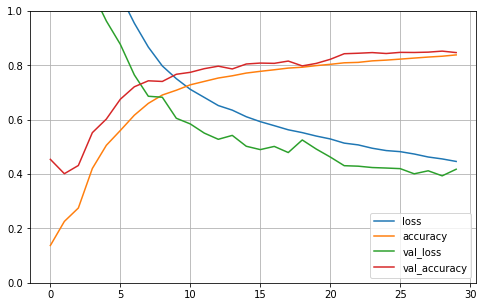

In [39]:
pd.DataFrame(model_history_2.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
# fashion_mnist = keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# fashion_mnist = keras.datasets.fashion_mnist
# (x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

# x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# x_test = x_test_n

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [46]:
train_images=train_images.reshape((60000, 28, 28, 1))
test_images=test_images.reshape((10000, 28, 28,1))

In [47]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")

In [48]:
train_images=train_images/255.0
test_images=test_images/255.0

In [49]:
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

#model

model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.4))
model_3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.6))
model_3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.7))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.6))
model_3.add(Dense(10, activation='softmax'))

In [50]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# history_3 = model_3.fit(x_train, y_train, epochs=50, batch_size=512, shuffle=True, validation_split=0.2)
history_3 = model_3.fit(train_images, train_labels, epochs=50, batch_size=512, shuffle=True, validation_split=0.1)
# validation_data=(x_valid, y_valid)
# validation_split=0.2

Epoch 1/50
106/106 [==============================] - 23s 113ms/step - loss: 1.8393 - accuracy: 0.4067 - val_loss: 1.9500 - val_accuracy: 0.2512
Epoch 2/50
106/106 [==============================] - 10s 98ms/step - loss: 0.9050 - accuracy: 0.6593 - val_loss: 1.5330 - val_accuracy: 0.4550
Epoch 3/50
106/106 [==============================] - 10s 98ms/step - loss: 0.7241 - accuracy: 0.7294 - val_loss: 1.2322 - val_accuracy: 0.6042
Epoch 4/50
106/106 [==============================] - 10s 98ms/step - loss: 0.6288 - accuracy: 0.7684 - val_loss: 0.9462 - val_accuracy: 0.7085
Epoch 5/50
106/106 [==============================] - 10s 98ms/step - loss: 0.5601 - accuracy: 0.7971 - val_loss: 0.6774 - val_accuracy: 0.7775
Epoch 6/50
106/106 [==============================] - 10s 97ms/step - loss: 0.5094 - accuracy: 0.8188 - val_loss: 0.4578 - val_accuracy: 0.8295
Epoch 7/50
106/106 [==============================] - 10s 97ms/step - loss: 0.4700 - accuracy: 0.8324 - val_loss: 0.3957 - val_accuracy

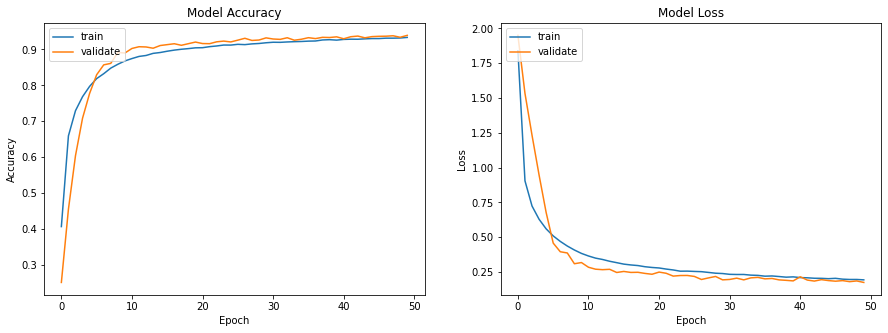

In [52]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
axs[0].plot(history_3.history['accuracy']) 
axs[0].plot(history_3.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
axs[1].plot(history_3.history['loss']) 
axs[1].plot(history_3.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

In [54]:
score = model_3.evaluate(train_images, train_labels, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.12761645019054413
Teste accuracy: 0.9555500149726868


# Avaliando o desempenho e prevendo

In [ ]:
# Calculamos a perda e a precisão do teste
score = model.evaluate(x_test,y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste accuracy:', score[1])

Teste loss: 0.3366333842277527
Teste accuracy: 0.8820000290870667


In [ ]:
x_new = x_test[:] # considerando as três primeiras amostras do conjunto de dados de teste

In [ ]:
y_proba = model.predict(x_new) # probabilidade para cada classe
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred
# categoria começa de 0 a 9
# primeira categoria de registro = 9 que pode ser confirmado pelas probabilidades acima
# categoria da segunda amostra = 2
# categoria da terceira amostra = 1

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
pred_names = np.array(class_names)[y_pred]
pred_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44) Pullover


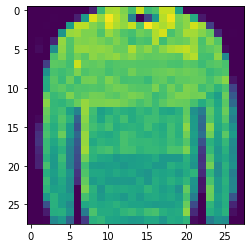

In [ ]:
print(plt.imshow(x_test[20]))
print(plt.imshow(x_test[20]),pred_names[20])

AxesImage(54,36;334.8x217.44)


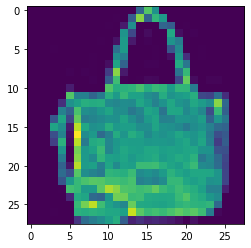

In [ ]:
print(plt.imshow(x_test[2000]))

AxesImage(54,36;334.8x217.44)


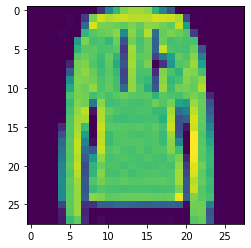

In [ ]:
print(plt.imshow(x_test[525]))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_new)
print(y_pred)

[[3.3825695e-06 3.8628036e-07 6.5566477e-05 ... 2.7664371e-02
  7.0207153e-04 9.6174222e-01]
 [1.1373546e-05 2.5406990e-08 9.8671442e-01 ... 6.6119410e-12
  6.9021184e-09 1.6687219e-11]
 [2.0375967e-06 9.9999738e-01 1.6198864e-08 ... 2.0313344e-13
  8.6761691e-09 1.2582500e-12]
 ...
 [1.1833573e-02 8.4372056e-07 6.8143854e-04 ... 4.1039252e-06
  9.8639536e-01 6.6005024e-09]
 [5.6129288e-06 9.9992752e-01 4.8479751e-07 ... 2.6506831e-11
  2.1855682e-07 5.2459939e-08]
 [3.2565364e-05 3.7191146e-06 2.4438350e-04 ... 4.6222587e-03
  1.4940049e-03 8.1663522e-05]]
